# Loading Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklego.linear_model import LADRegression

ModuleNotFoundError: No module named 'catboost'

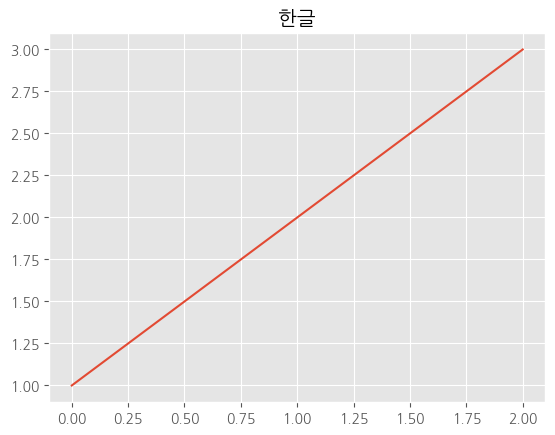

In [15]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# Reading Data Files

In [3]:
train = pd.read_csv('train.csv')
original = pd.read_csv('CrabAgePrediction.csv')

test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
print('train data size : ', train.shape)
print('test data size : ', test.shape)
print('submission data size : ', submission.shape)

train data size :  (74051, 10)
test data size :  (49368, 9)
submission data size :  (49368, 2)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
original.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


### 결측치 없음

# Data Description
- Sex: Gender of the Crab - Male, Female and Indeterminate
- Length: Length of the Crab in feet
- Diameter: Diameter of the Crab in feet
- Height: Height of the Crab in feet
- Weight: Weight of the Crab in ounces
- Shucked Weight: Weight without the shell in ounces
- Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces
- Shell Weight: Weight of the Shell in ounces
- Age: Age of the Crab in months

# Data Exploration

### 데이터 중복 확인 =>> 없음

In [9]:
print(f'There are {train.shape[0]} observations in the train dataset')
print('There are', train.drop(columns=['id'], axis = 1).drop_duplicates().shape[0], 'unique observations in the train dataset')
print('There are', train.drop(columns=['id', 'Age'], axis = 1).drop_duplicates().shape[0], 'unique observations (only features) in the trian dataset')

There are 74051 observations in the train dataset
There are 74051 unique observations in the train dataset
There are 74051 unique observations (only features) in the trian dataset


In [10]:
print('There are', test.shape[0], 'observations in the train dataset')
print('There are', test.drop(columns=['id'], axis = 1).drop_duplicates().shape[0], 'unique observations (only features) in the trian dataset')

There are 49368 observations in the train dataset
There are 49368 unique observations (only features) in the trian dataset


### train, original 데이터 분포와 상관계수 확인

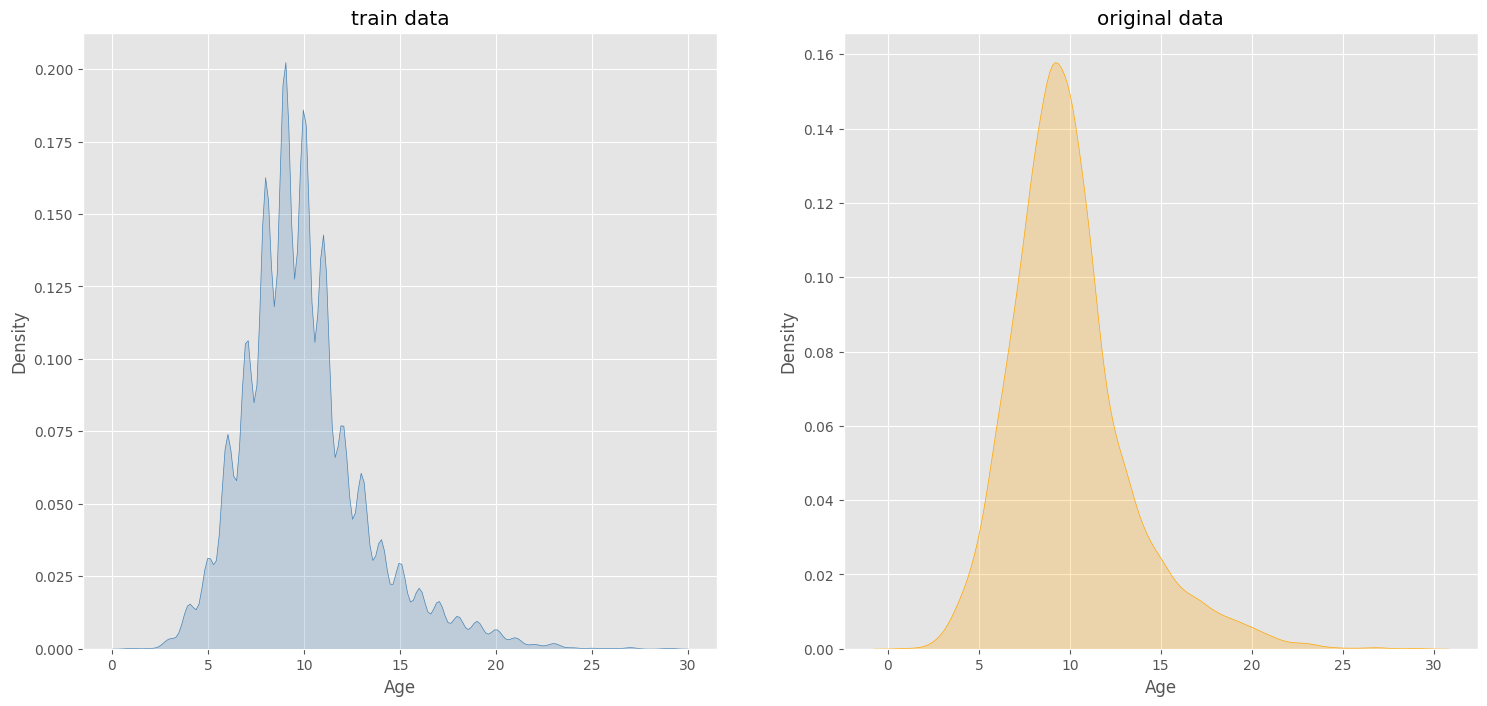

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

sns.kdeplot(ax = axes[0], data = train, x = 'Age', fill = True, color = 'steelblue').set_title('train data');
sns.kdeplot(ax = axes[1], data = original, x = 'Age', fill = True, color = 'orange').set_title('original data');
plt.show()

- train 데이터와 원본 데이터에 분포상 큰 차이가 없는 것으로 보임

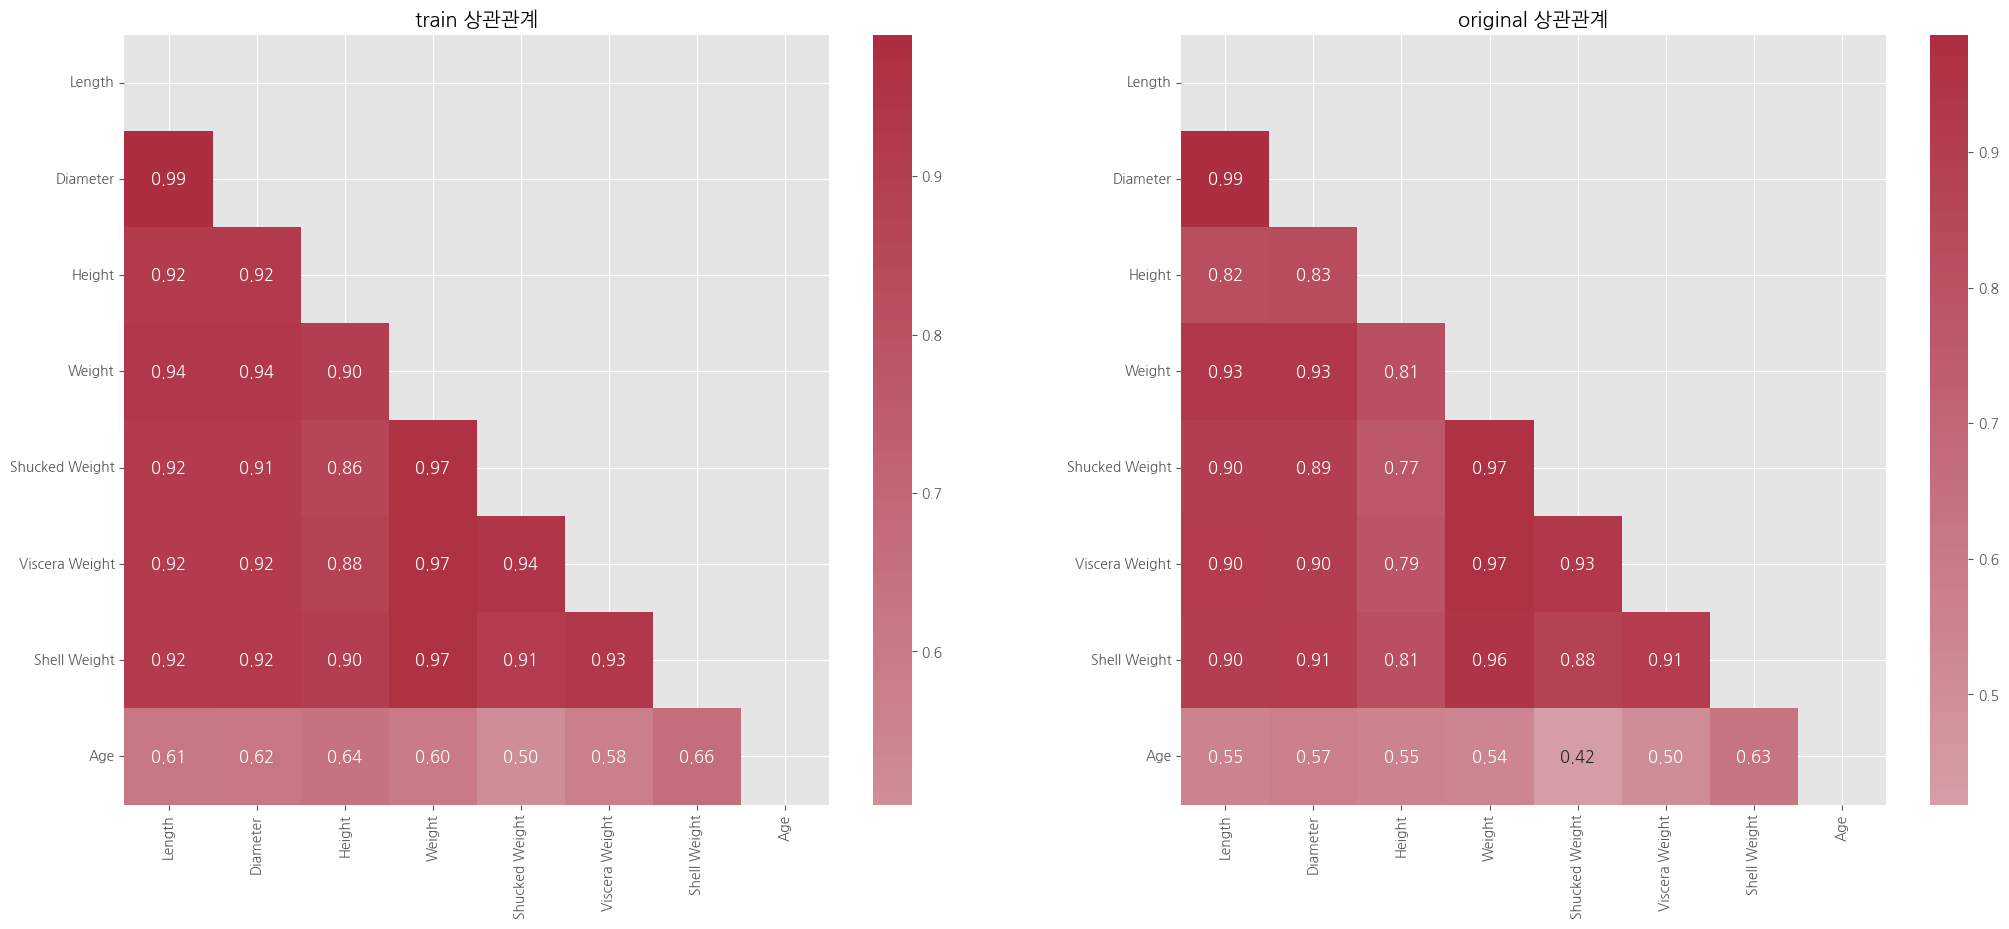

In [16]:
corr_train = train.drop(columns = ['id', 'Sex'], axis = 1).corr()
corr_original = original.drop(columns = ['Sex'], axis = 1).corr()

train_mask = np.triu(np.ones_like(corr_train, dtype = bool))
original_mask = np.triu(np.ones_like(corr_original, dtype = bool))

cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

fig, axes = plt.subplots(1, 2, figsize = (25, 10))
sns.heatmap(corr_train, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size':12}, ax = axes[0], mask = train_mask).set_title('train 상관관계')

sns.heatmap(corr_original, annot = True, cmap = cmap, fmt = '.2f', center = 0,
           annot_kws = {'size':12}, ax = axes[1], mask = original_mask).set_title('original 상관관계')

plt.show()

- age와 shell weight의 상관계수가 가장 높음
- age 와 shucked weight의 상관계수가 가장 낮음

### sex, age 관계 살피기

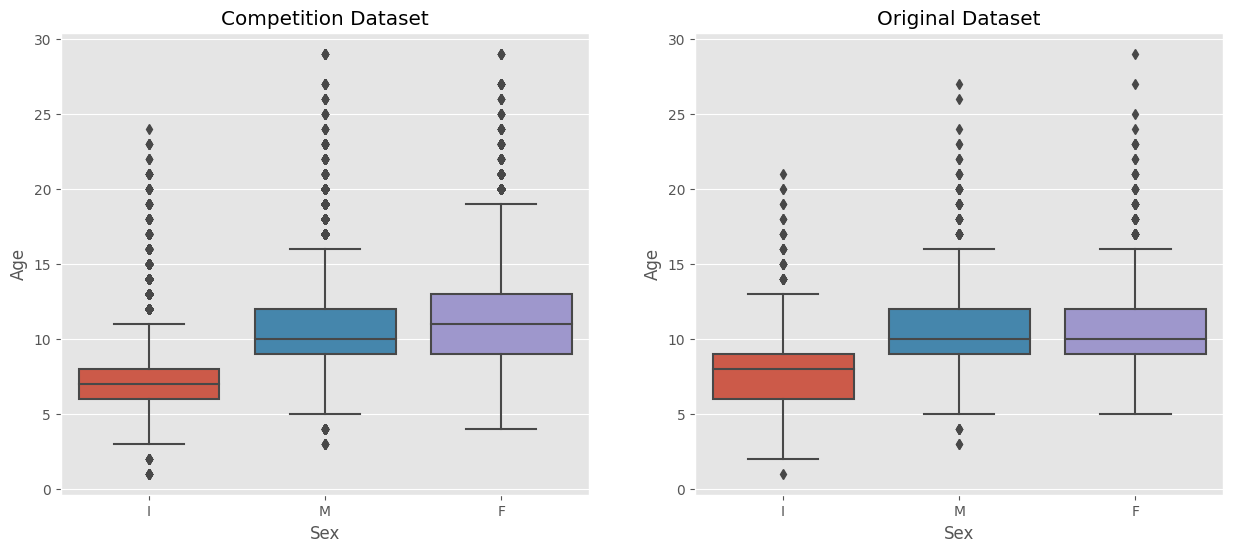

In [17]:
# sex컬럼을 범주형 데이터로 변환, I/M/F 순서의 범주를 가지도록 함(시각화용)
original['Sex'] = pd.Categorical(original['Sex'], categories = ['I', 'M', 'F'], ordered = True)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.boxplot(ax = axes[0], data = train, x = 'Sex', y = 'Age').set_title('Competition Dataset')
sns.boxplot(ax = axes[1], data = original, x = 'Sex', y = 'Age').set_title('Original Dataset');

- shell 무게와 age의 상관관계 확인(양)

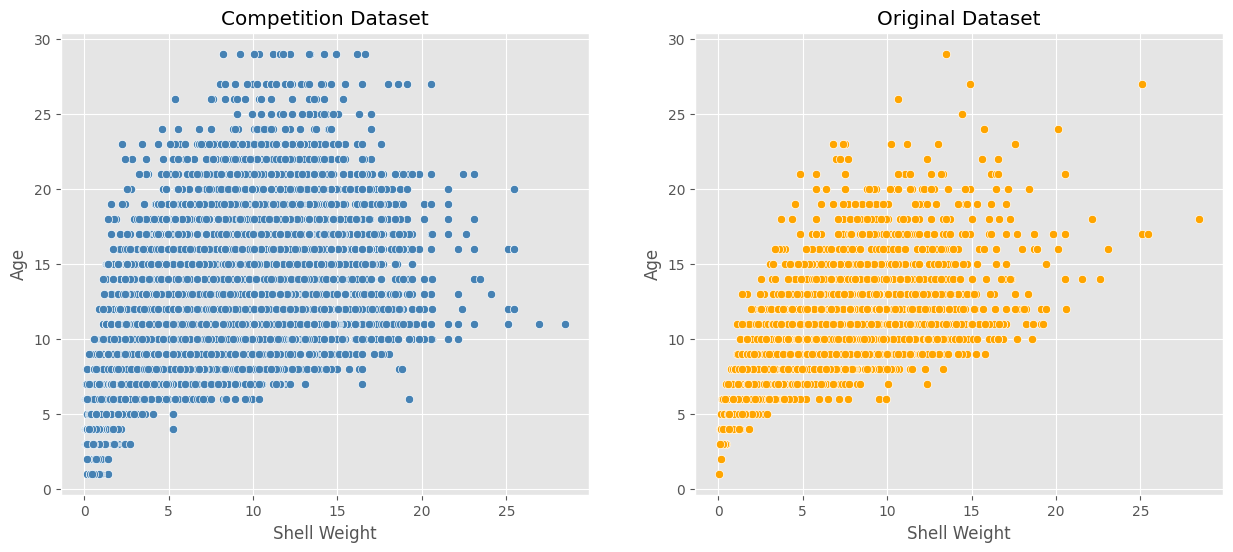

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.scatterplot(ax = axes[0], data = train, x = 'Shell Weight', y = 'Age', color = 'steelblue').set_title('Competition Dataset')
sns.scatterplot(ax = axes[1], data = original, x = 'Shell Weight', y = 'Age', color = 'orange').set_title('Original Dataset');

- diameter 와 age 간 선형 상관관계 확인

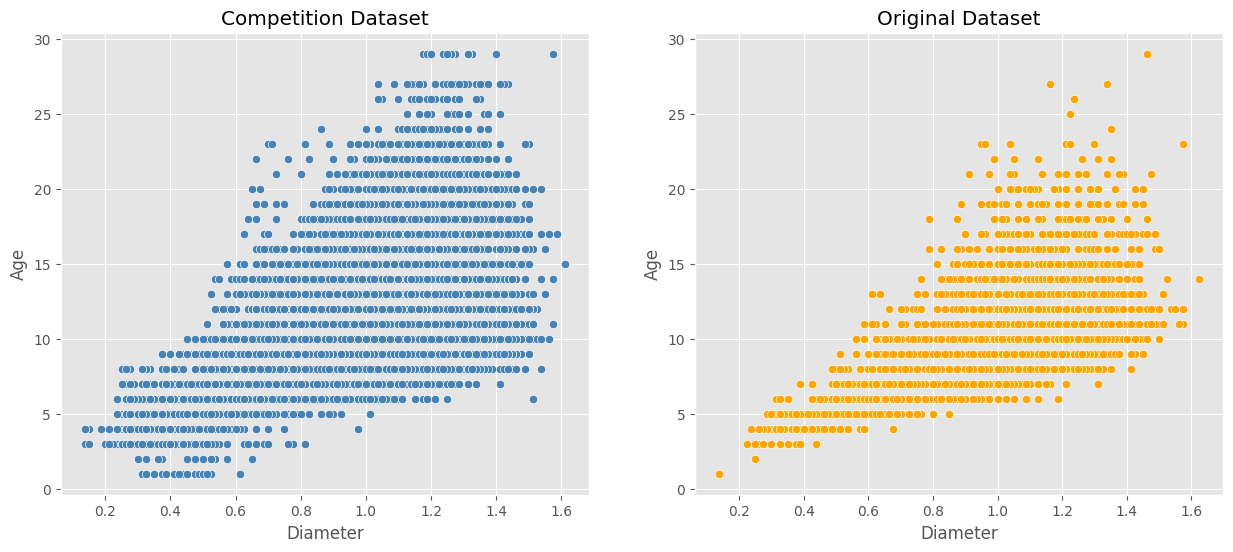

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.scatterplot(ax = axes[0], data = train, x = 'Diameter', y = 'Age', color = 'steelblue').set_title('Competition Dataset')
sns.scatterplot(ax = axes[1], data = original, x = 'Diameter', y = 'Age', color = 'orange').set_title('Original Dataset');

# Baseline Modeling 1.0

- train, original 데이터셋 합치기
- 성별을 라벨 인코딩하기

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['generated'] = 1
original['generated'] = 0
test['generated'] = 1

In [21]:
train.drop(columns = 'id', axis = 1, inplace = True)

In [22]:
train = pd.concat([train, original], axis = 0).reset_index(drop = True)

In [23]:
train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,generated
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1


In [24]:
X = train.drop(columns = 'Age', axis = 1)
Y = train['Age']

In [25]:
test_baseline = test.drop(columns = ['id'], axis = 1)
# test_baseline['Sex'] = le.transform(test_baseline['Sex'])

sex_mapping = {'I': 0, 'M': 1, 'F': 2}
test_baseline['Sex'] = test_baseline['Sex'].map(sex_mapping)

In [26]:
test_baseline

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,generated
0,0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,1
1,0,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1
2,2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1
3,2,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1
4,0,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,1
...,...,...,...,...,...,...,...,...,...
49363,2,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,1
49364,0,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,1
49365,2,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,1
49366,2,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,1


In [29]:
gb_cv_scores, gb_preds = list(), list()
hist_cv_scores, hist_preds = list(), list()
lgb_cv_scores, lgb_preds = list(), list()
xgb_cv_scores, xgb_preds = list(), list()
ens_cv_scores, ens_preds = list(), list()

- kfold  & Gradient Boosting

In [27]:
skf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [31]:
for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    print(f'---------------------------{i}-----------------------------------')
    
    #Gradient Boosting
    gb_md = GradientBoostingRegressor(loss = 'absolute_error',
                                     n_estimators = 100,
                                     max_depth = 8,
                                     learning_rate = 0.01,
                                     min_samples_split = 10,
                                     min_samples_leaf = 20)
    gb_md.fit(X_train, Y_train)
    gb_pred_1 = gb_md.predict(X_test[X_test['generated'] == 1])
    gb_pred_2 = gb_md.predict(test_baseline)
    gb_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], gb_pred_1)
    gb_preds.append(gb_score_fold)
    gb_preds.append(gb_pred_2)
    
    print('Fold', i, '-->> GradientBoosting of MAE is ---->>', gb_score_fold)

---------------------------0-----------------------------------
Fold 0 -->> GradientBoosting of MAE is ---->> 1.5989366894122488
---------------------------1-----------------------------------
Fold 1 -->> GradientBoosting of MAE is ---->> 1.613938753817271
---------------------------2-----------------------------------
Fold 2 -->> GradientBoosting of MAE is ---->> 1.5908084078258862
---------------------------3-----------------------------------
Fold 3 -->> GradientBoosting of MAE is ---->> 1.5859621357579117
---------------------------4-----------------------------------
Fold 4 -->> GradientBoosting of MAE is ---->> 1.5560320198295978
---------------------------5-----------------------------------
Fold 5 -->> GradientBoosting of MAE is ---->> 1.5521670226958664
---------------------------6-----------------------------------
Fold 6 -->> GradientBoosting of MAE is ---->> 1.638580173293953
---------------------------7-----------------------------------
Fold 7 -->> GradientBoosting of MAE

In [ ]:
# histgradientBoosting